In [4]:
# using N-grams feature for capture contextual information from reviews...

import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

# Set the file path to your dataset
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Perform sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()

# Function to generate N-grams
def generate_ngrams(text, n):
    tokenized_text = word_tokenize(text)
    ngrams_list = list(ngrams(tokenized_text, n))
    return [' '.join(grams) for grams in ngrams_list]

# Add N-grams as a new column
df['ngrams'] = df['reviewText'].apply(lambda x: generate_ngrams(x, n=2))  # Change n as desired (e.g., n=2 for bigrams)

# Perform sentiment analysis on N-grams
for index, row in df.iterrows():
    review = row['reviewText']
    ngrams_list = row['ngrams']
    sentiment_scores = sia.polarity_scores(review)
    
# Print the preprocessed reviewText column
print(df['reviewText'])
print("Sentiment Score:", sentiment_scores['compound'])
print("N-grams:", ngrams_list)

print()


1       purchas devic work advertis never much phone m...
2       work expect sprung higher capac think made bit...
3       think work greathad diff bran 64gb card went s...
4       bought retail packag arriv legit orang envelop...
5       mini storag doesnt anyth els suppos purchas ad...
                              ...                        
4910    bought sandisk 16gb class 10 use htc inspir 3 ...
4911    use extend capabl samsung galaxi note 10 great...
4912    great card fast reliabl come option adapt sd s...
4913           good amount space stuff want fit gopro say
4914    ive heard bad thing 64gb micro sd card crap we...
Name: reviewText, Length: 4913, dtype: object
Sentiment Score: 0.2023
N-grams: ['ive heard', 'heard bad', 'bad thing', 'thing 64gb', '64gb micro', 'micro sd', 'sd card', 'card crap', 'crap week', 'week sk', 'sk far', 'far good', 'good transfer', 'transfer speed', 'speed normal', 'normal like', 'like space', 'space price', 'price stealwould', 'stealwould recomm

Sentiment Score: 0.0

Sentiment Score: 0.4019

Sentiment Score: 0.2732

Sentiment Score: 0.8591

Sentiment Score: 0.0

Sentiment Score: 0.7184

Sentiment Score: 0.6476

Sentiment Score: 0.0

Sentiment Score: 0.5994

Sentiment Score: 0.891

Sentiment Score: 0.0

Sentiment Score: 0.0

Sentiment Score: 0.802

Sentiment Score: 0.3089

Sentiment Score: 0.7184

Sentiment Score: 0.8519

Sentiment Score: 0.5888

Sentiment Score: 0.886

Sentiment Score: -0.2732

Sentiment Score: 0.4215

Sentiment Score: 0.7184

Sentiment Score: 0.911

Sentiment Score: 0.7351

Sentiment Score: -0.2023

Sentiment Score: 0.2023

Sentiment Score: 0.4404

Sentiment Score: 0.5267

Sentiment Score: 0.6249

Sentiment Score: 0.0

Sentiment Score: 0.8481

Sentiment Score: 0.8658

Sentiment Score: -0.4939

Sentiment Score: 0.8176

Sentiment Score: -0.7184

Sentiment Score: 0.0

Sentiment Score: -0.4019

Sentiment Score: 0.6705

Sentiment Score: 0.9538

Sentiment Score: 0.6369

Sentiment Score: 0.3182

Sentiment Score: 0.3

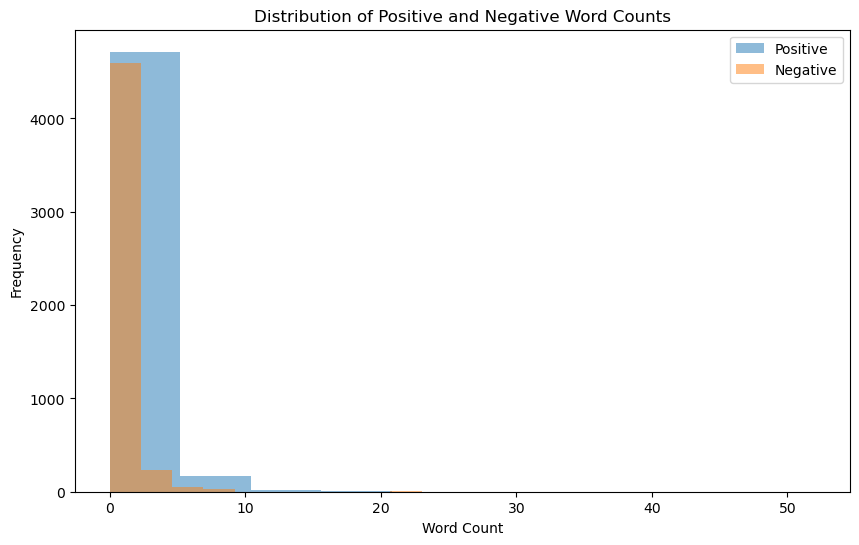

      Unnamed: 0  reviewerName  overall  \
1              1          0mie      5.0   
2              2           1K3      4.0   
3              3           1m2      5.0   
4              4  2&amp;1/2Men      5.0   
5              5       2Cents!      5.0   
...          ...           ...      ...   
4910        4910        ZM "J"      1.0   
4911        4911            Zo      5.0   
4912        4912     Z S Liske      5.0   
4913        4913      Z Taylor      5.0   
4914        4914           Zza      5.0   

                                             reviewText  reviewTime  day_diff  \
1     purchas devic work advertis never much phone m...  2013-10-25       409   
2     work expect sprung higher capac think made bit...  2012-12-23       715   
3     think work greathad diff bran 64gb card went s...  2013-11-21       382   
4     bought retail packag arriv legit orang envelop...  2013-07-13       513   
5     mini storag doesnt anyth els suppos purchas ad...  2013-04-29       588 

In [5]:
# perform positive and negative word count in each review using sentiment lexicons

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

# Set the file path to your dataset
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Positive and Negative word counts
positive_count = []
negative_count = []

# Perform sentiment analysis using VADER
for index, row in df.iterrows():
    review = row['reviewText']
    sentiment_scores = sia.polarity_scores(review)
    positive_count.append(sum([1 for word in review.split() if word in sia.lexicon and sia.lexicon[word] > 0]))
    negative_count.append(sum([1 for word in review.split() if word in sia.lexicon and sia.lexicon[word] < 0]))
    
   
    print("Sentiment Score:", sentiment_scores['compound'])
    print()

# Add positive and negative word count columns to the DataFrame
df['Positive Word Count'] = positive_count
df['Negative Word Count'] = negative_count


# Plot the word counts
plt.figure(figsize=(10, 6))
plt.hist(df['Positive Word Count'], bins=10, alpha=0.5, label='Positive')
plt.hist(df['Negative Word Count'], bins=10, alpha=0.5, label='Negative')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Positive and Negative Word Counts')
plt.legend()
plt.show()


# Print the updated DataFrame
print(df)

In [9]:
# Add sentiment polarity IN N-grams feature

import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

# Set the file path to your dataset
file_path = r'C:\Users\nh013\Desktop\amazaon dataset\amazon_reviews.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['reviewText'] = df['reviewText'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Perform sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()

# Function to generate N-grams
def generate_ngrams(text, n):
    tokenized_text = word_tokenize(text)
    ngrams_list = list(ngrams(tokenized_text, n))
    return [' '.join(grams) for grams in ngrams_list]

# Add N-grams and sentiment polarity as new columns
n = 2  # Set n as desired (e.g., n=2 for bigrams)
df['ngrams'] = df['reviewText'].apply(lambda x: generate_ngrams(x, n=n))
df['sentiment_polarity'] = df['reviewText'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Print the N-grams and sentiment polarity for 10 rows
for index, row in df.head(10).iterrows():
    ngrams_list = row['ngrams']
    sentiment_polarity = row['sentiment_polarity']
  
    print("N-grams:", ngrams_list)
    print("Sentiment Polarity:", sentiment_polarity)

# Print the first 10 rows of the DataFrame
print(df.head(10))


N-grams: ['purchas devic', 'devic work', 'work advertis', 'advertis never', 'never much', 'much phone', 'phone memori', 'memori sinc', 'sinc download', 'download lot', 'lot stuff', 'stuff brainer']
Sentiment Polarity: 0.0
N-grams: ['work expect', 'expect sprung', 'sprung higher', 'higher capac', 'capac think', 'think made', 'made bit', 'bit cheesier', 'cheesier earlier', 'earlier version', 'version paint', 'paint look', 'look clean']
Sentiment Polarity: 0.4019
N-grams: ['think work', 'work greathad', 'greathad diff', 'diff bran', 'bran 64gb', '64gb card', 'card went', 'went south', 'south 3', '3 monthsthi', 'monthsthi one', 'one held', 'held pretti', 'pretti well', 'well sinc', 'sinc s3', 's3 note3', 'note3 updat', 'updat 32114ive', '32114ive month', 'month zero', 'zero issu', 'issu sinc', 'sinc transfer', 'transfer s3', 's3 note3', 'note3 note2', 'note2 card', 'card reliabl', 'reliabl solidch']
Sentiment Polarity: 0.2732
N-grams: ['bought retail', 'retail packag', 'packag arriv', 'arr